## Capstone Project for Data Science - Tinyuka Session

### Project Overview

In this capstone project, you will apply your data science and machine learning skills to develop a predictive model for house prices. This project will involve data cleaning, exploratory data analysis (EDA), feature engineering, model training, and evaluation. You will use a real-world dataset to build a model that can accurately predict house prices based on various features.

### Instruction Prompts

Project Introduction
Objective: Develop a machine learning model to predict house prices using a dataset containing various house-related features.
Dataset: You will use the "House Prices - Advanced Regression Techniques" dataset from Kaggle (or any other relevant house price dataset).


### Project Phases

#### Phase 1: Data Collection and Preparation
Task 1.1: Download the dataset from Kaggle or another source.
Task 1.2: Load the dataset into a Pandas DataFrame.
Task 1.3: Inspect the dataset for missing values and handle them appropriately.
Task 1.4: Perform data cleaning to ensure the dataset is ready for analysis.

#### Phase 2: Exploratory Data Analysis (EDA)
Task 2.1: Conduct exploratory data analysis to understand the distribution of features and the target variable (house prices).
Task 2.2: Visualize the relationships between features and the target variable using scatter plots, histograms, and box plots.
Task 2.3: Identify and handle outliers in the dataset.
Phase 3: Feature Engineering
Task 3.1: Create new features that may help improve the model's performance.
Task 3.2: Encode categorical variables using one-hot or label encoding techniques.
Task 3.3: Normalize or standardize numerical features as needed.

#### Phase 4: Model Training and Evaluation
Task 4.1: Split the dataset into training and testing sets.
Task 4.2: Choose and justify the selection of machine learning algorithms (e.g., Linear Regression, Decision Tree, Random Forest, Gradient Boosting).
Task 4.3: Train multiple models and evaluate their performance using appropriate metrics (e.g., RMSE, MAE, R²).
Task 4.4: Perform hyperparameter tuning to optimize the model's performance.
Task 4.5: Select and evaluate the best-performing model on the testing set.

#### Phase 5: Model Interpretation and Reporting
Task 5.1: Interpret the results of the best-performing model and explain the importance of critical features.
Task 5.2: Create visualizations to support your findings and model interpretations.
Task 5.3: Write a comprehensive report summarizing the project, including the methodology, results, and conclusions.






### Deliverables
Code: Submit the complete code used for data preparation, EDA, feature engineering, model training, and evaluation (Jupyter Notebook format)
Report: Submit a detailed report (PDF or Jupyter Notebook format) documenting your approach, findings, and conclusions. The report should include visualizations and a clear explanation of your steps.
Presentation: Prepare a brief presentation (5-10 slides) summarizing your project and key findings. You may be asked to present this to your peers or instructors.

Submit: https://forms.gle/o4h2nihFqvgZX5dr7 


In [70]:
import pandas as pd  # Import pandas for data manipulation and analysis
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import numpy as np  # Import numpy for numerical operations
import seaborn as sns  # Import seaborn for advanced statistical data visualization

import warnings  # Import warnings to handle warning messages
warnings.filterwarnings('ignore')  # Ignore warning messages to avoid cluttering the output


In [71]:
# Ensure all columns are shown
pd.set_option('display.max_columns', None)

### Phase 1: Data Collection and Preparation

In [72]:
# Task 1.1: Download the dataset from Kaggle or another source.

In [73]:
houseData = pd.read_csv(r'C:/Users/KLAUS/Desktop/JUPYTER/capstone-project/house-prices-data/train.csv') # load train dataset from file path

In [74]:
# Task 1.2: Load the dataset into a Pandas DataFrame.

In [75]:
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [76]:
houseData.shape # Checking for the dimension of the dataset

(1460, 81)

In [77]:
houseData.columns # Checking to know all the columns in the dataset

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [78]:
# Task 1.3: Inspect the dataset for missing values and handle them appropriately.

In [79]:
houseData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [80]:
pd.set_option('display.max_rows', None) # See all the rows in the series to ascertain the number features with missing values
houseData.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [81]:
missing_values = houseData.isna().sum() # Identifying missing values

missing_values[missing_values > 0] # Display columns with missing values and their counts


LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [82]:
missing_percentage = (missing_values / len(houseData)) * 100 # Calculating the percentage of missing values

missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})#Combine the count and percentage of missing values

missing_data[missing_data['Missing Values'] > 0] # Filtering to show only columns with missing values

,Missing Values,Percentage
LotFrontage,259,17.739726
Alley,1369,93.767123
MasVnrType,8,0.547945
MasVnrArea,8,0.547945
BsmtQual,37,2.534247
BsmtCond,37,2.534247
BsmtExposure,38,2.602740
BsmtFinType1,37,2.534247
BsmtFinType2,38,2.602740
Electrical,1,0.068493


In [83]:
# Defining a threshold ( 50% missing values)
"""
    There is no inituition in leaving columns with over 50% missing 
    values.
    PoolQC, MiscFeatures, Alley, Fence, FirePlaceQU will dropped for now as the show over 50% missing values.
    
"""
threshold = 50.0

# Drop columns with missing values above the threshold
houseData_clean_1 = houseData.drop(columns=missing_data[missing_data['Percentage'] > threshold].index)

Though the target variable has no null values, I still think i should handle the other variables/ features with null values by dropping the variables with over 50% missing values, this might intensity of missing values in PoolQC, MiscFeatures, Alley, Fence, FirePlaceQU etc. can be due to the improper data entry. I think visualizing these variables might give a false sense of perspective.

In [84]:
houseData_clean_1.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [85]:
# Fill missing values with the mean for numerical columns
numerical_columns = houseData_clean_1.select_dtypes(include=['float64', 'int64']).columns
houseData_clean_1[numerical_columns] = houseData_clean_1[numerical_columns].fillna(houseData_clean_1[numerical_columns].mean())


# Fill missing values with the mode for categorical columns
categorical_columns = houseData_clean_1.select_dtypes(include=['object']).columns
houseData_clean_1[categorical_columns] = houseData_clean_1[categorical_columns].fillna(houseData_clean_1[categorical_columns].mode().iloc[0])

Why use mean in filling numerical missing values?
Why use mode in filling categorical missing values?

In [86]:
houseData_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [87]:
# Verify that there are no missing values left
no_missing_values = houseData_clean_1.isna().sum().sum()

# Output the result
houseData_clean_1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [88]:
# Task 1.4: Perform data cleaning to ensure the dataset is ready for analysis.

In [89]:
houseData_clean_1.duplicated().sum()  # Checking datasets for duplicates row

0

In [90]:
houseData_clean_1.columns.duplicated() # Checking datasets for duplicates columns

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [91]:
houseData_clean_1.dtypes # Checking the dtypes of all the features

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


### It appears that they are no duplicated rows and columns in the dataset after dropping the columns with more than 50% missing values and imputing the numerical and categorical missiong values with mean and mode respectively, And also all the variables are in their correct dtypes. So it they is no need for further cleaning at this point.

### Phase 2: Exploratory Data Analysis (EDA)

In [92]:
# Task 2.1: Conduct exploratory data analysis to understand the distribution of features and the target variable (house prices).

In [93]:
houseData_cleaned = houseData_clean_1 # Summary statistics for numerical features
houseData_cleaned.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.994583,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.506164,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Number of numerical features: 38


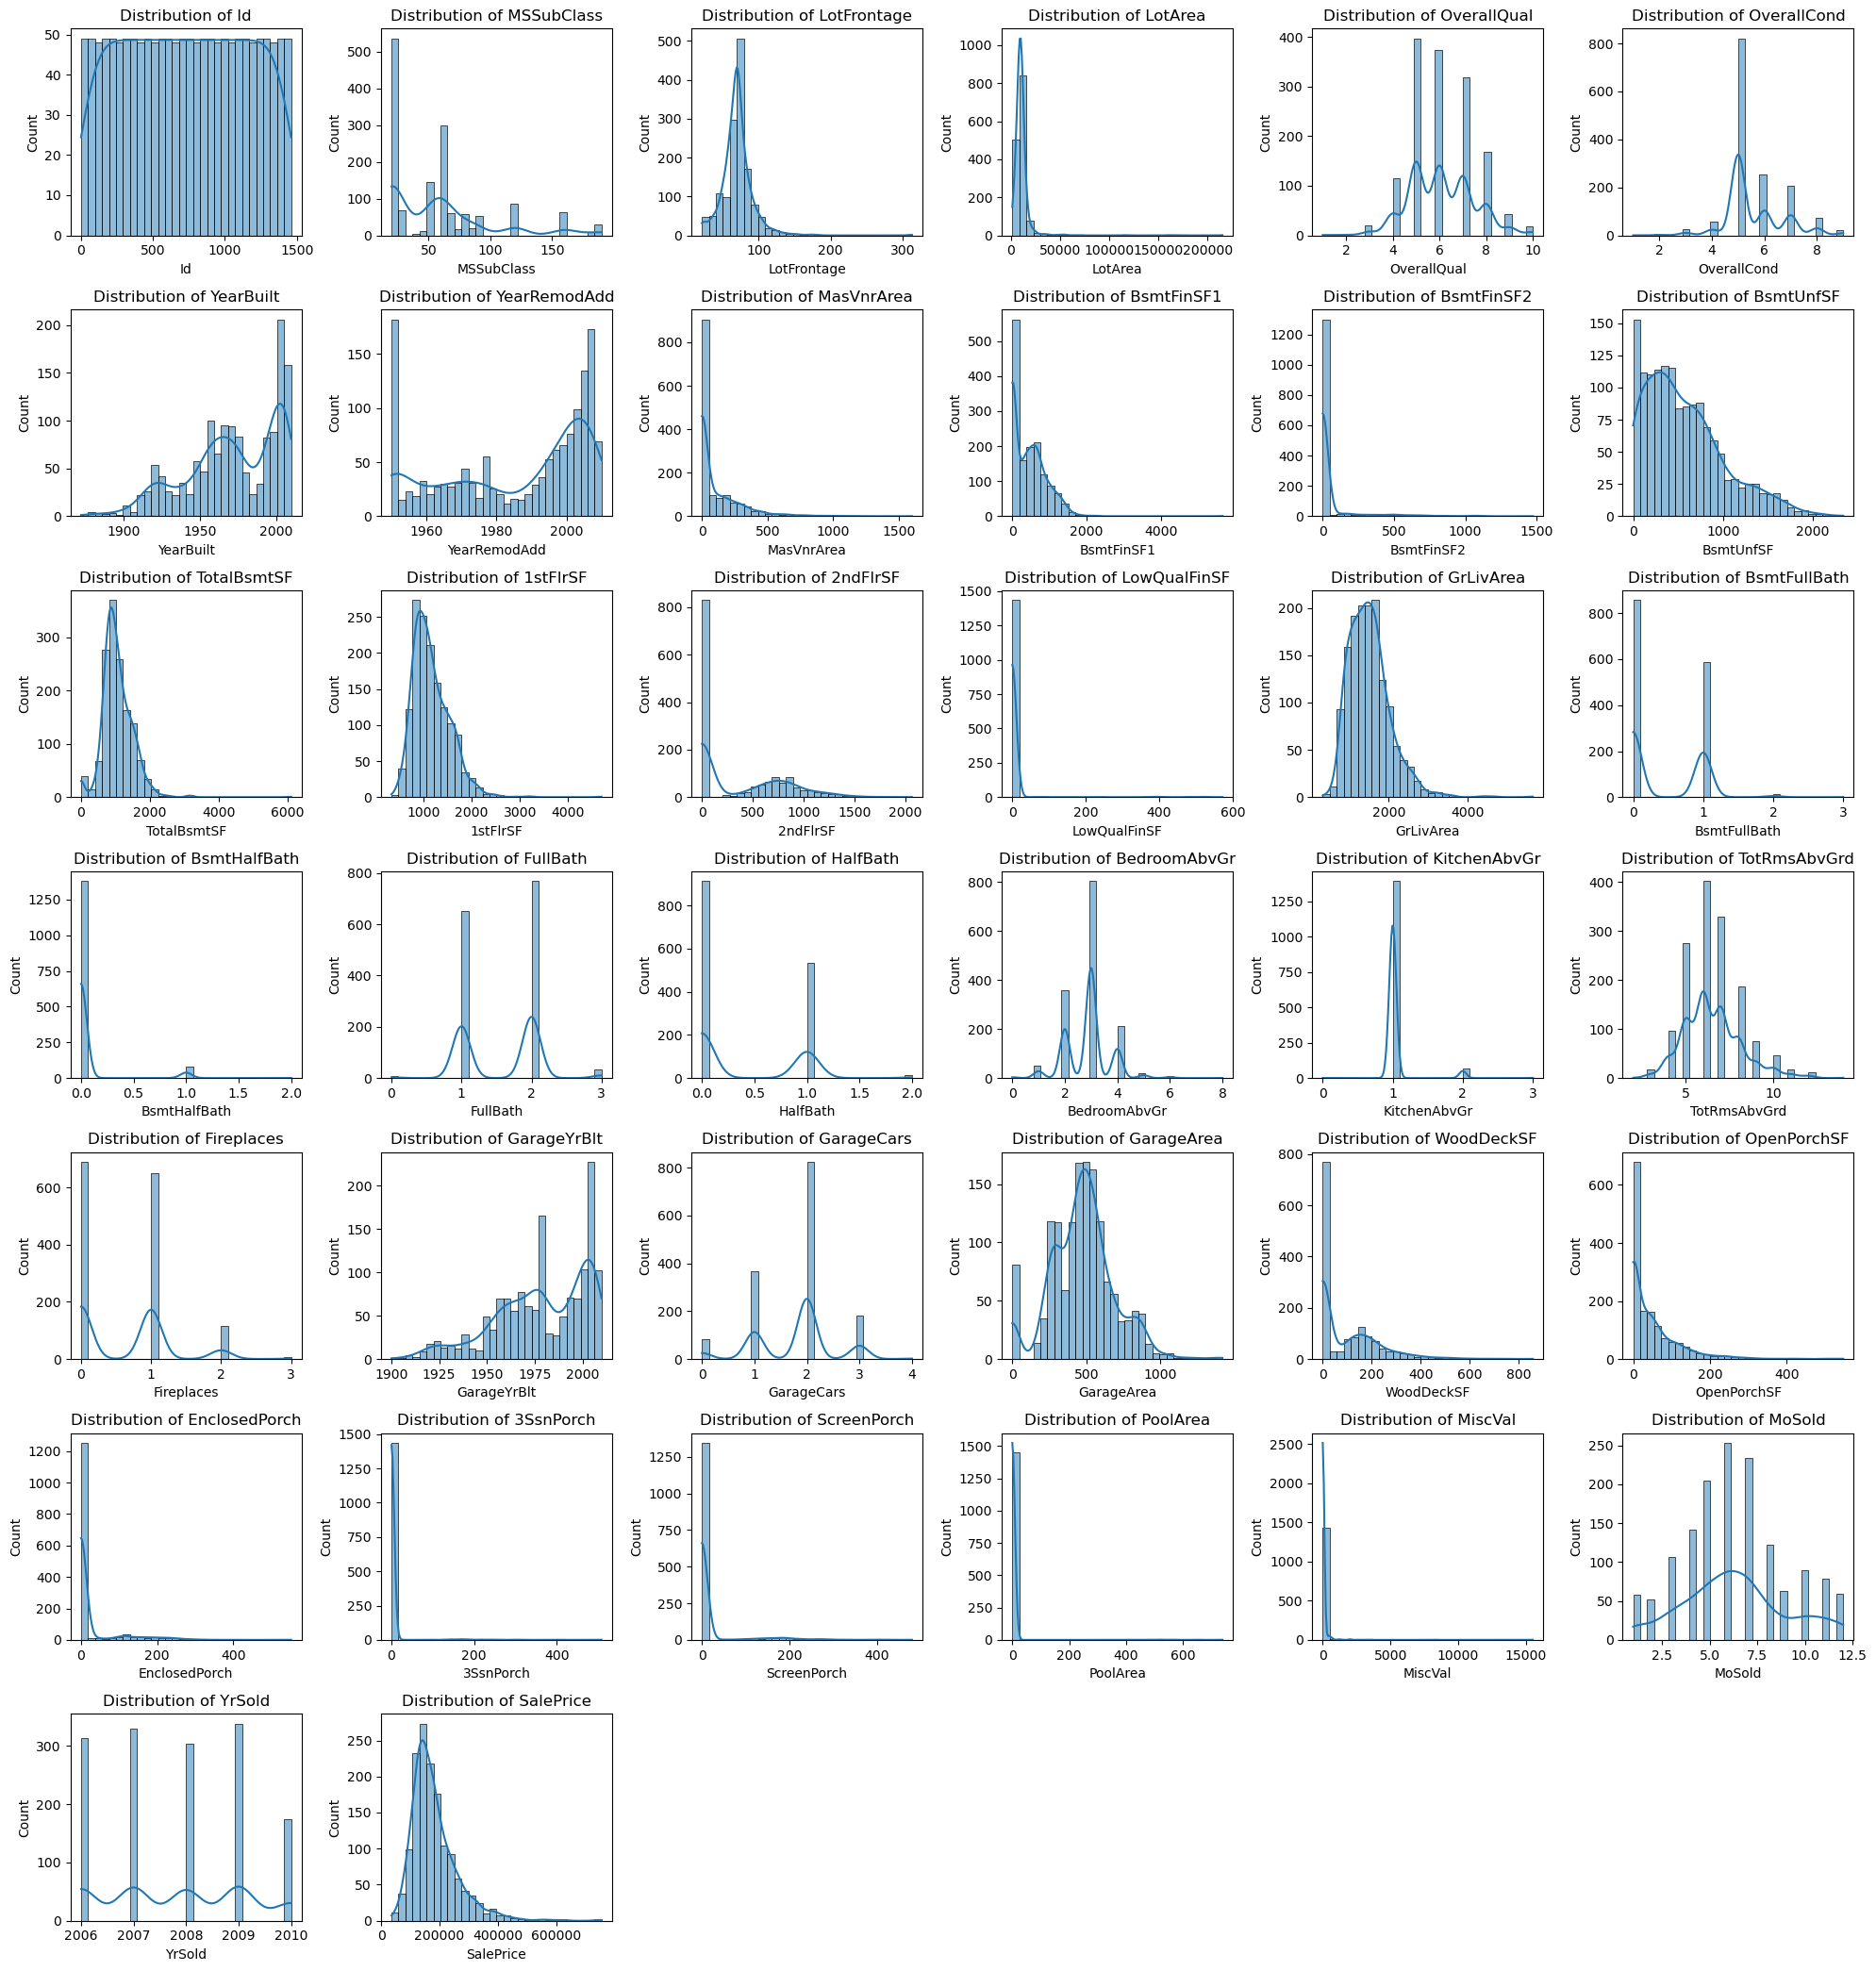

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Let's get the summary visualization of the numerical features.

# Numerical features
numerical_features = houseData_cleaned.select_dtypes(include=['float64', 'int64']).columns

num_numerical_features = len(numerical_features)
print(f"Number of numerical features: {num_numerical_features}")


# Calculate the number of rows and columns for the subplots
num_rows = math.ceil(num_numerical_features / 6)
num_cols = min(6, num_numerical_features)

# Plotting the distribution of numerical features
plt.figure(figsize=(20, num_rows * 3))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(houseData_cleaned[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


### This is a summary visualization of all the numerical features, will zoom in and visualize some key numerical features now

In [95]:
num_zoom_features_1 = ['SalePrice', 'OpenPorchSF', 'GarageArea', 'GarageYrBlt', 'YearBuilt', 'GrLivArea']

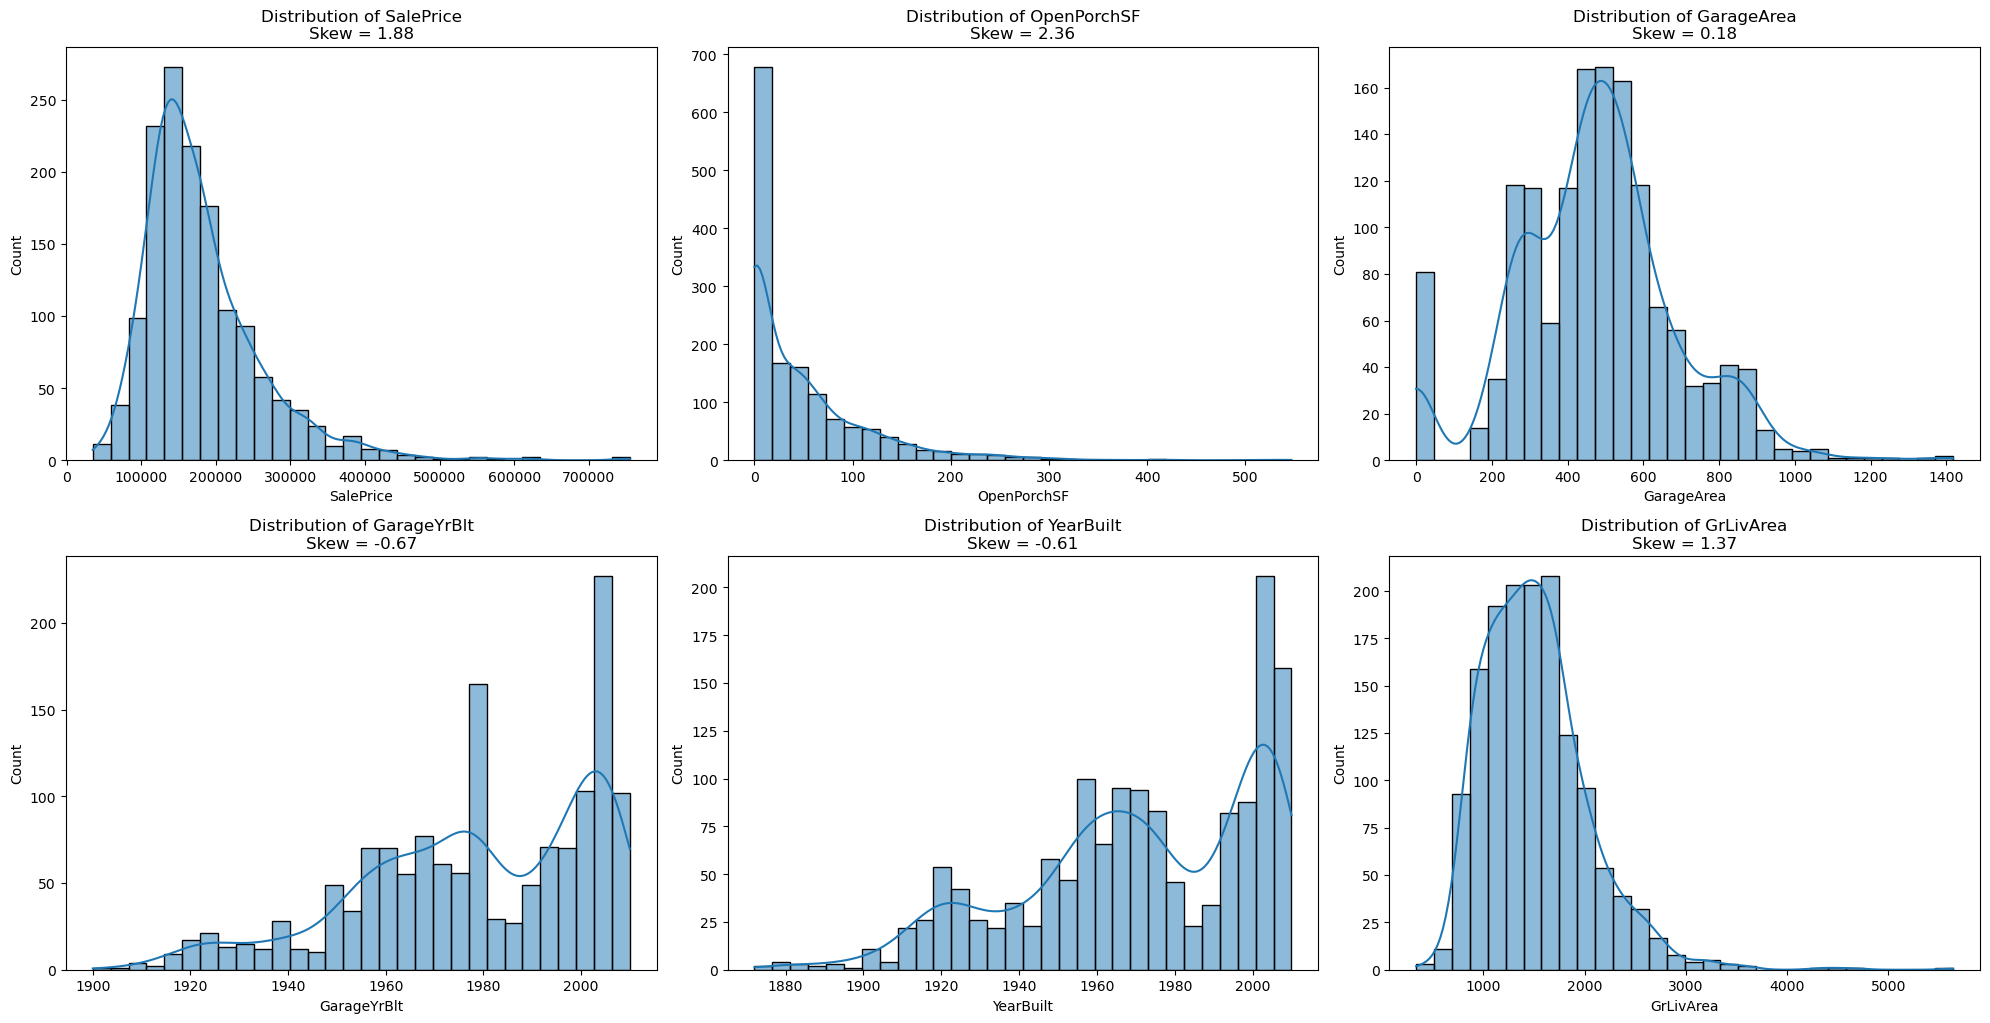

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew



# Plotting the distribution of numerical features with skew values
plt.figure(figsize=(20, 15))
for i, feature in enumerate(num_zoom_features_1, 1):
    plt.subplot(3, 3, i)
    sns.histplot(houseData_cleaned[feature], kde=True, bins=30)
    skew_value = skew(houseData_cleaned[feature].dropna())
    plt.title(f'Distribution of {feature}\nSkew = {skew_value:.2f}')
        
plt.tight_layout()
plt.show()


### Insights

In [97]:
num_zoom_features_2 = ['MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF']

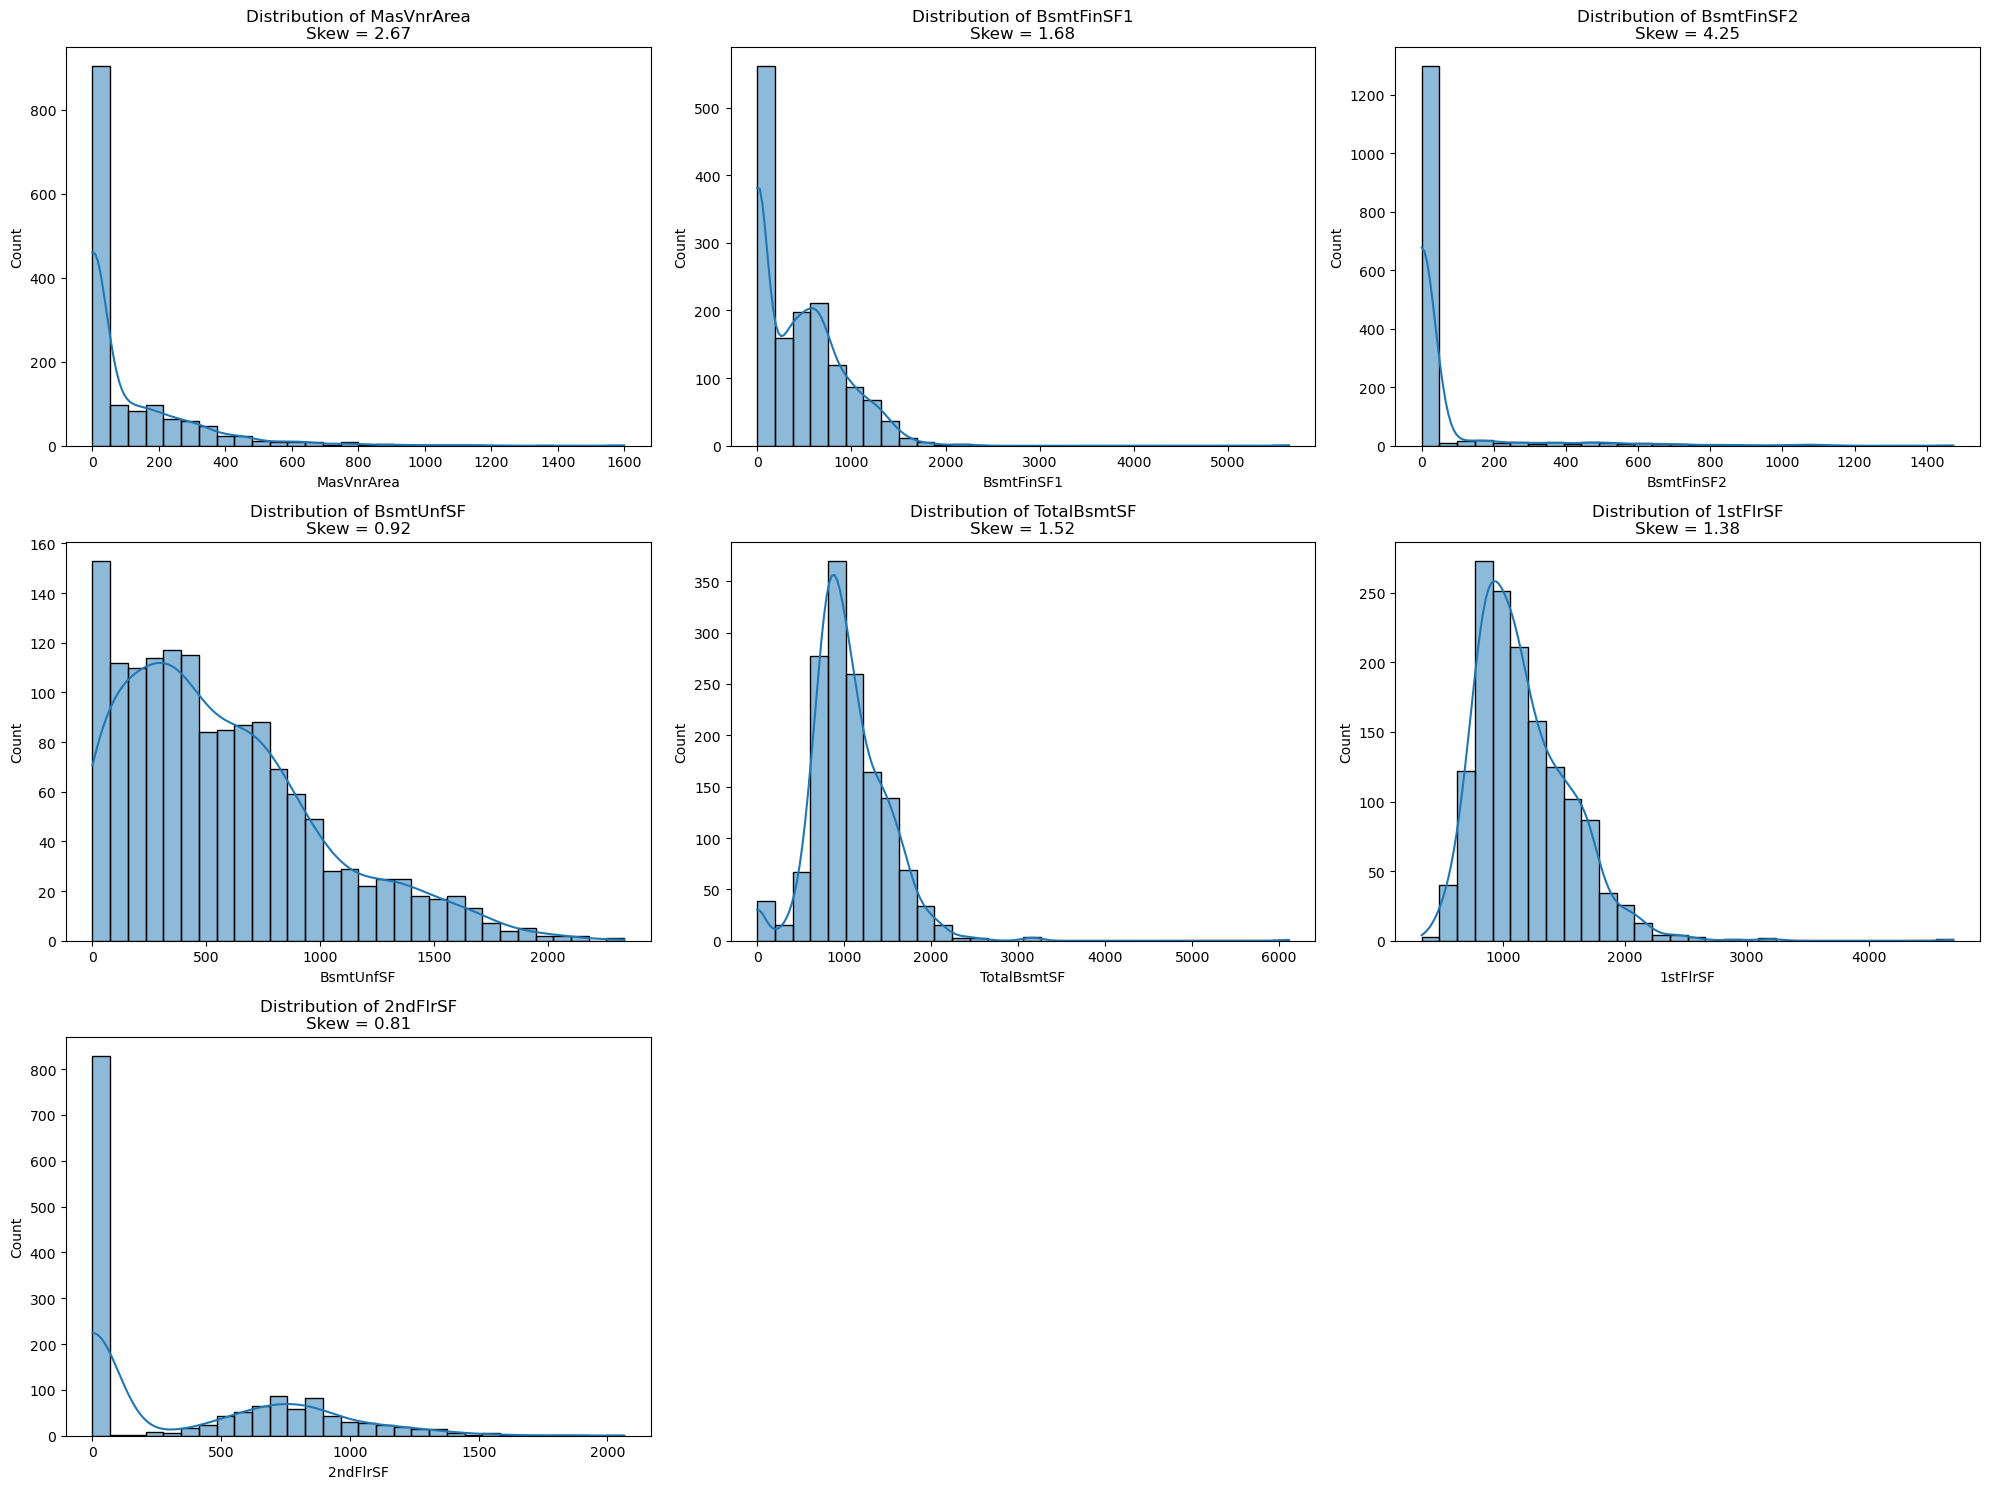

In [98]:
# Plotting the distribution of numerical features with skew values
plt.figure(figsize=(20, 15))
for i, feature in enumerate(num_zoom_features_2, 1):
    plt.subplot(3, 3, i)
    sns.histplot(houseData_cleaned[feature], kde=True, bins=30)
    skew_value = skew(houseData_cleaned[feature].dropna())
    plt.title(f'Distribution of {feature}\nSkew = {skew_value:.2f}')
        
plt.tight_layout()
plt.show()

### Insights

In [100]:
categorical_features

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

Number of categorical_features: 39


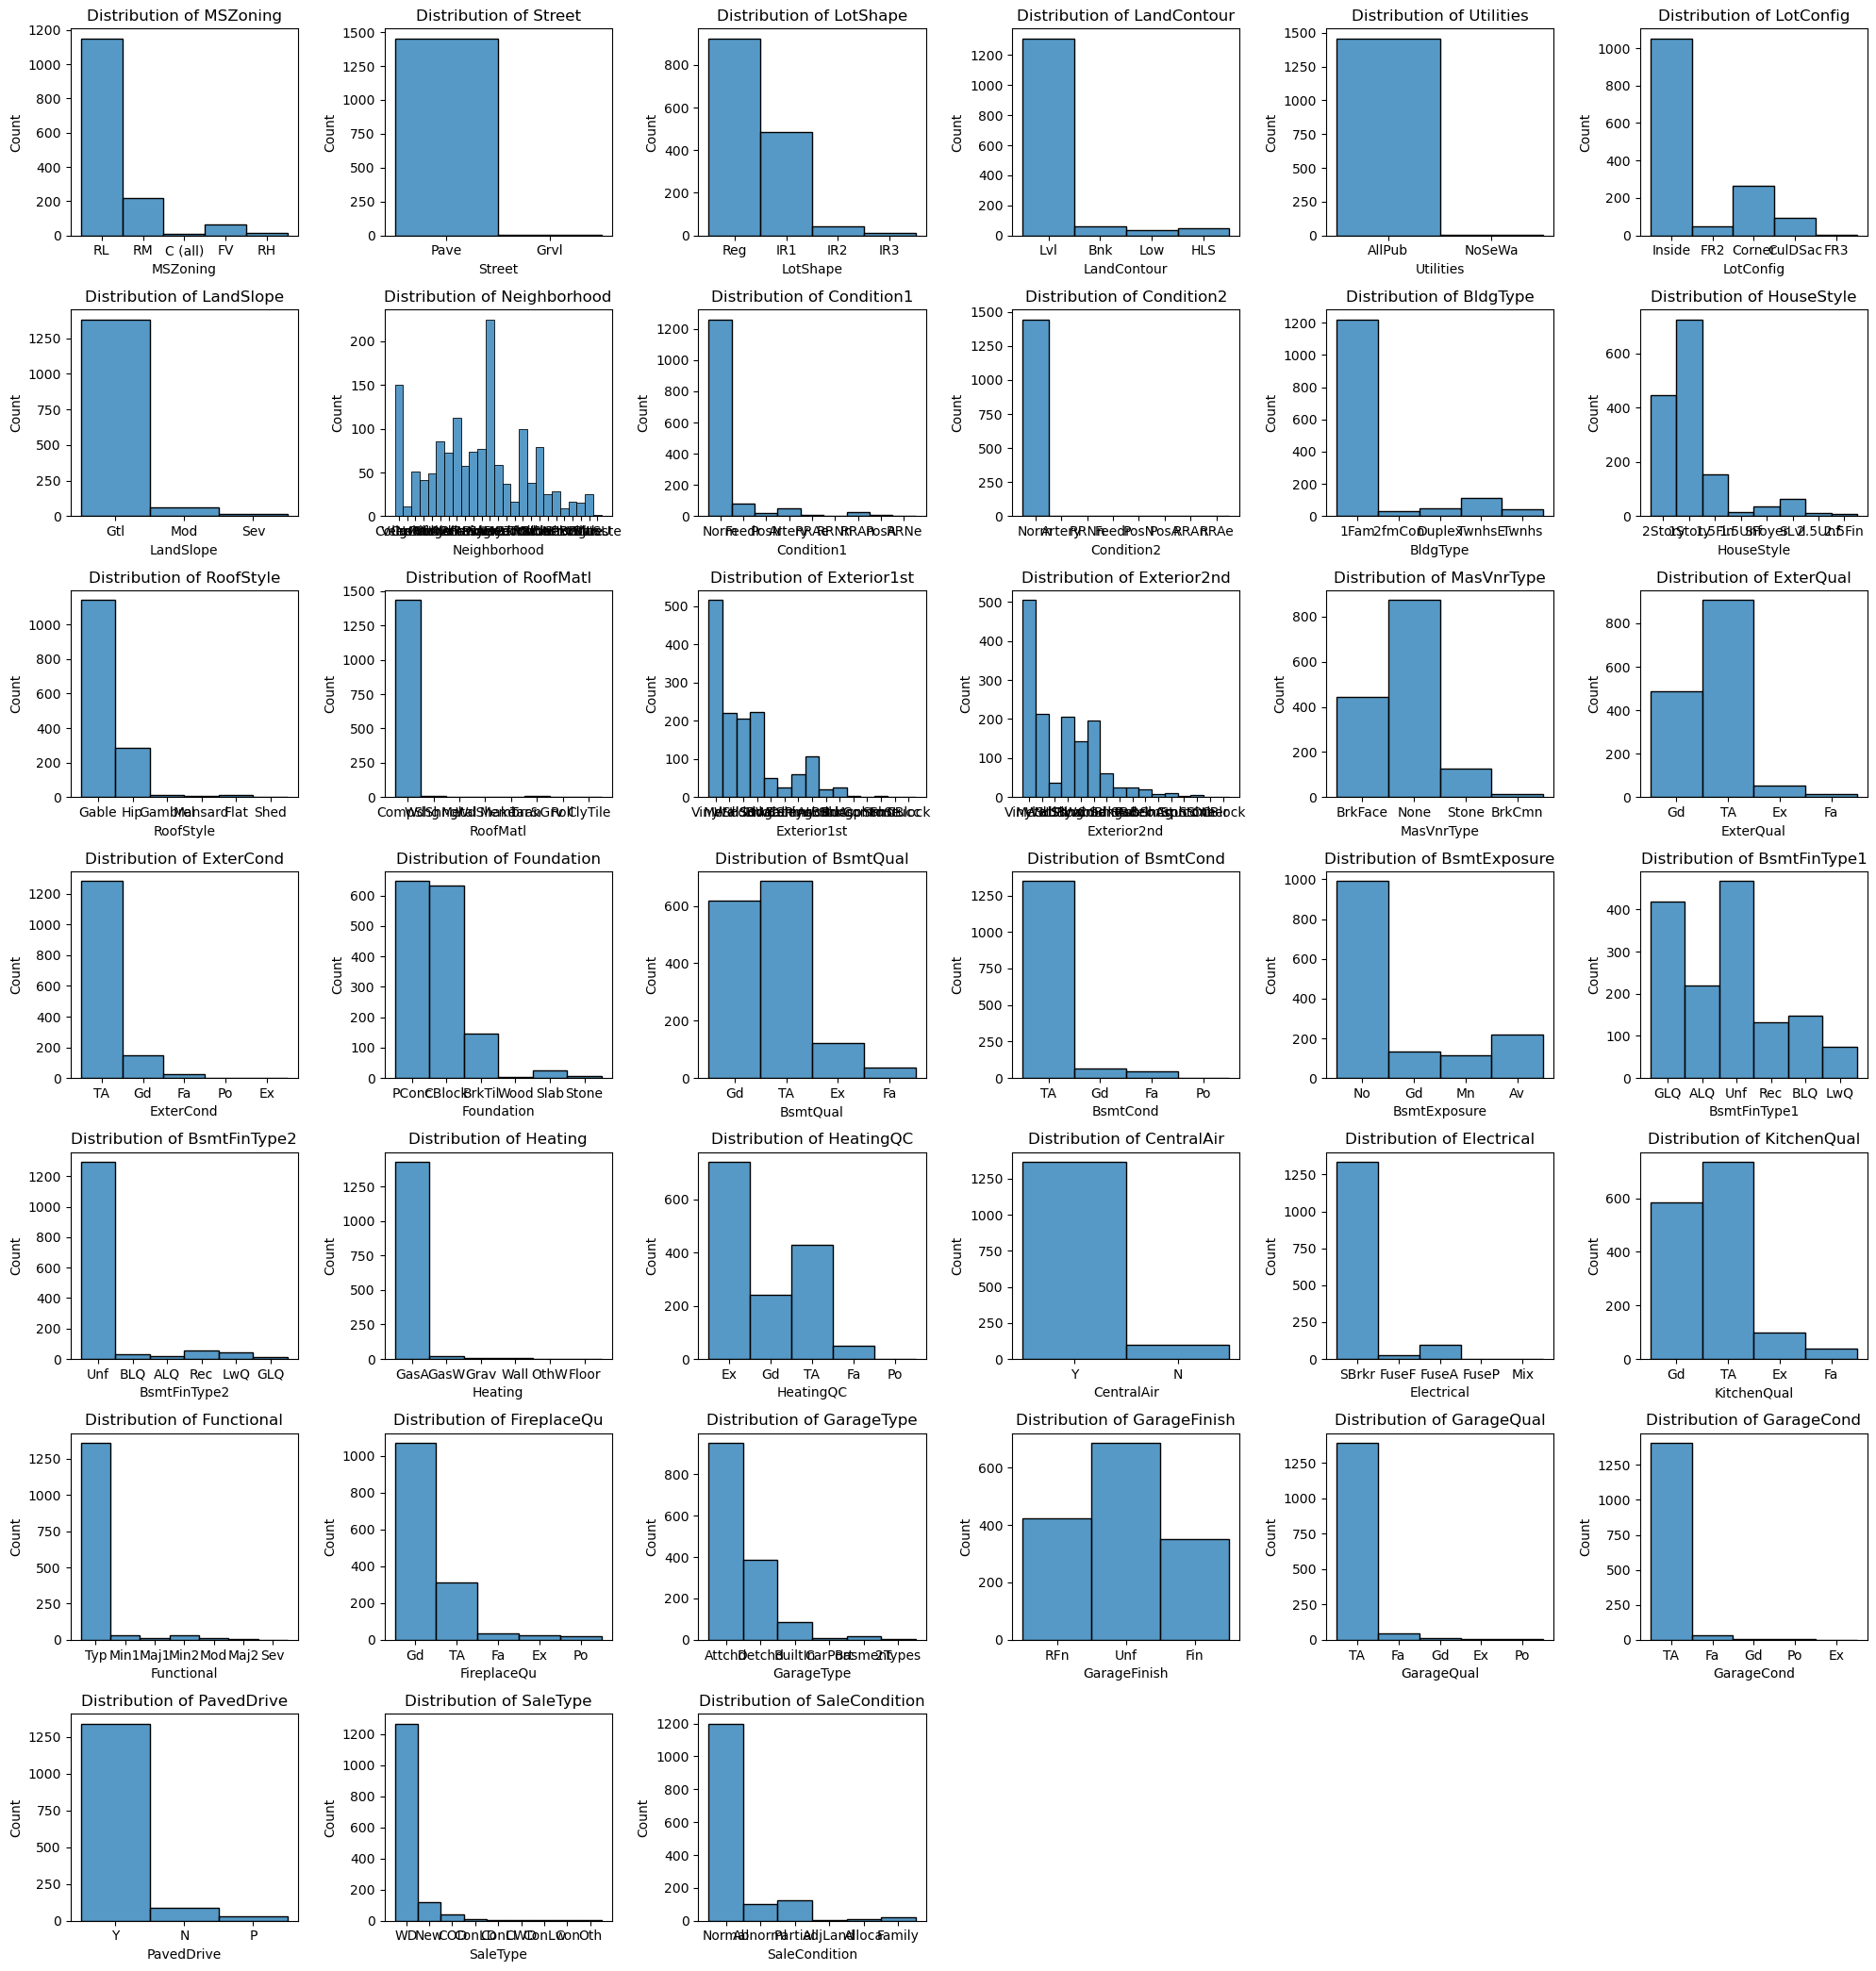

In [99]:

# Let's get the summary visualization of the numerical features.

# categorical features
categorical_features = houseData_cleaned.select_dtypes(include=['object']).columns



# Plotting the distribution of categorical features
num_categorical_features = len(categorical_features)
print(f"Number of categorical_features: {num_categorical_features}")


# Calculate the number of rows and columns for the subplots
num_rows = math.ceil(num_categorical_features / 6)
num_cols = min(6, num_categorical_features)

# Plotting the distribution of numerical features
plt.figure(figsize=(20, num_rows * 3))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(houseData_cleaned[feature], kde=False, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

### This is a summary visualization of all the categorical features

In [102]:
# Task 2.2: Visualize the relationships between features and the target variable using scatter plots, histograms, and box plots.

In [103]:
# Compute the correlation matrix
correlation_matrix= houseData_cleaned.corr()
correlation_matrix

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050199,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000070,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.080187,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,0.043340,0.122156,0.363358,0.414266,0.072483,0.036849,0.368392,0.091481,-0.006419,0.180424,0.048258,0.237023,-0.005805,0.320146,0.235755,0.064324,0.269729,0.323663,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024812,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.518018,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.306169,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.780555,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.618130,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050199,0.022895,0.179283,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,-0.072302,0.114184,0.362452,0.342160,0.174019,-0.069068,0.389893,0.085055,0.026669,0.275730,0.200802,0.102417,-0.037364,0.280027,0.247906,0.249367,0.363778,0.372567,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,-0.008184,0.475241
BsmtFinSF1,-0.005024,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.150338,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

In [117]:
# Getting the correlation_matrix in relation to SalePrice
correlation_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.475241
GarageYrBlt      0.470177
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [104]:
# Plot of Correclation matrix
#plt.figure(figsize=(10, 8))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
#plt.title('Correlation Matrix')
#plt.show()

### The above code, visualizes an Heatmap for the correlation matrix of the numerical features in the House Price Dataset, but a direct Heatmap is crowded and unable to comprehend, So it was commented out,  Heatmap was ploted for strong correlation instead.

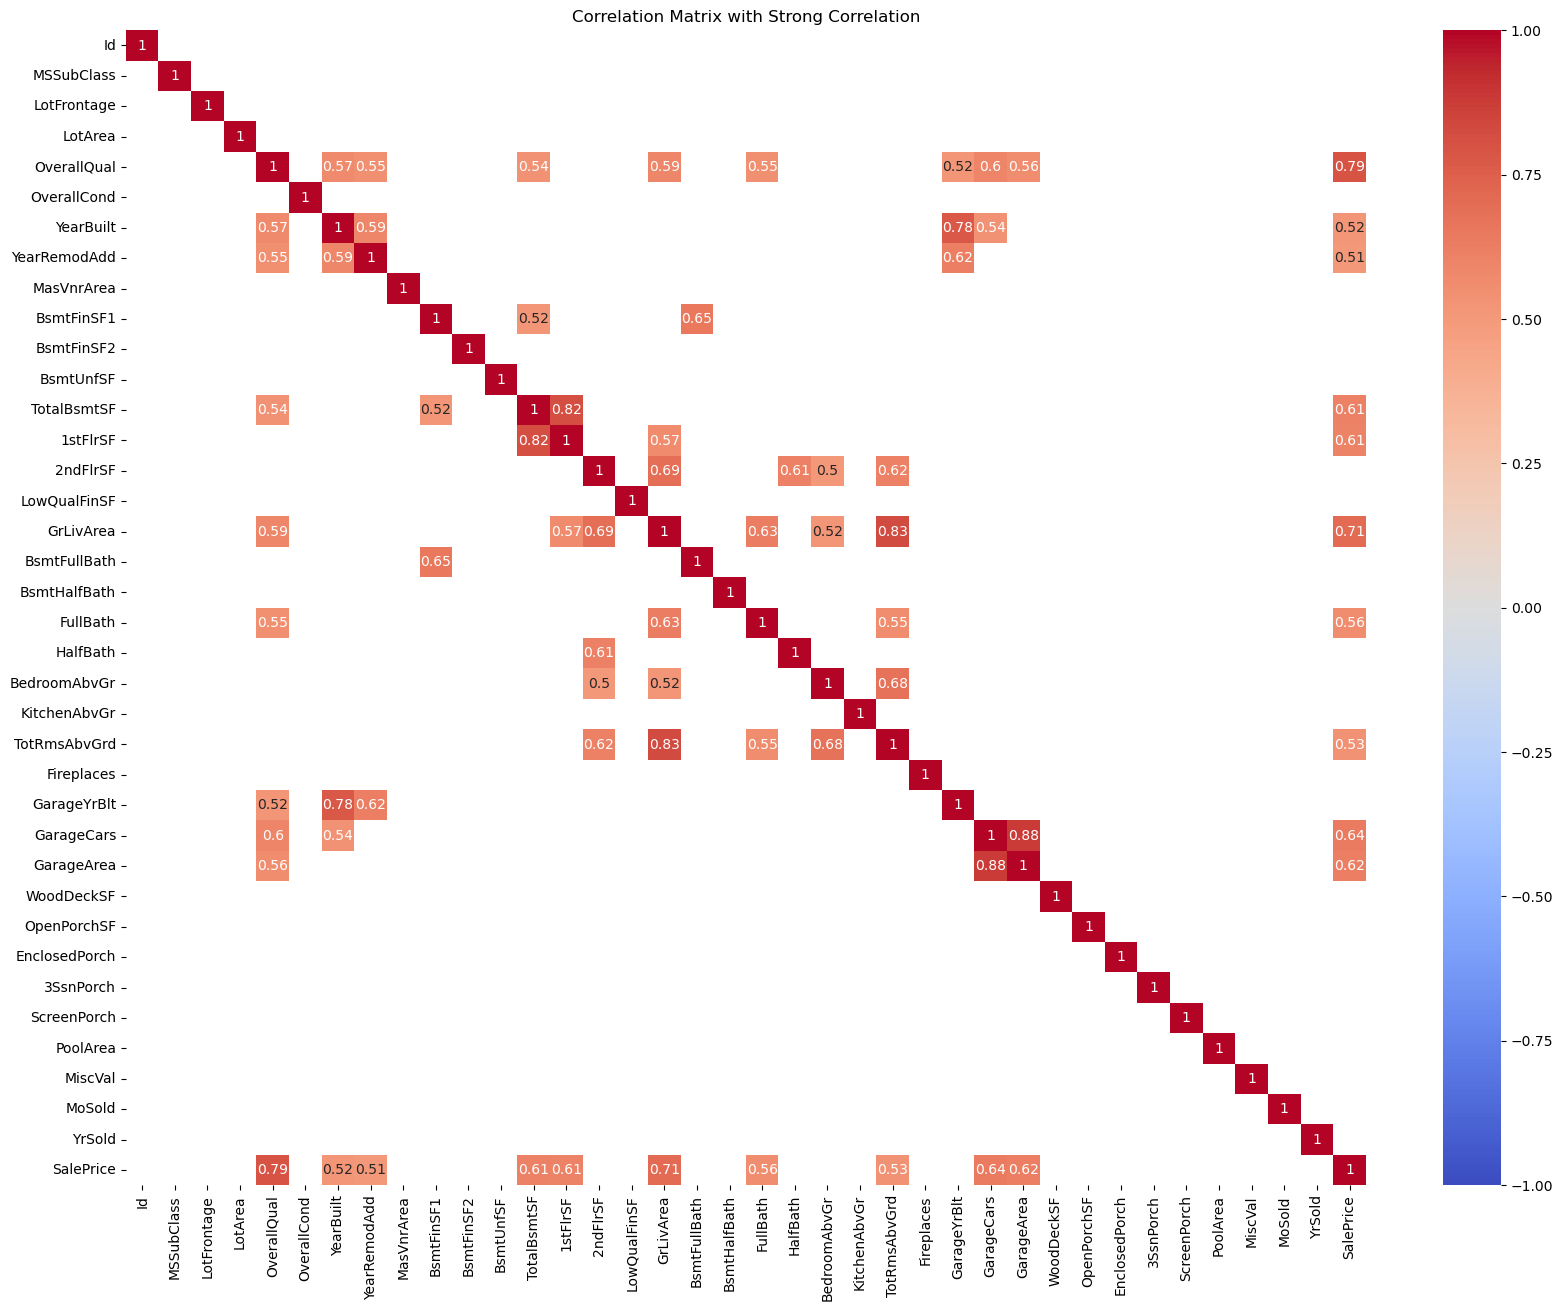

In [118]:

# Filtering to show only strong correlations (e.g., |correlation| > 0.5)
strong_corr_matrix = correlation_matrix[(correlation_matrix >= 0.5) | (correlation_matrix <= -0.5)]

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(strong_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, mask=strong_corr_matrix.isnull())
plt.title('Correlation Matrix with Strong Correlation')
plt.show()


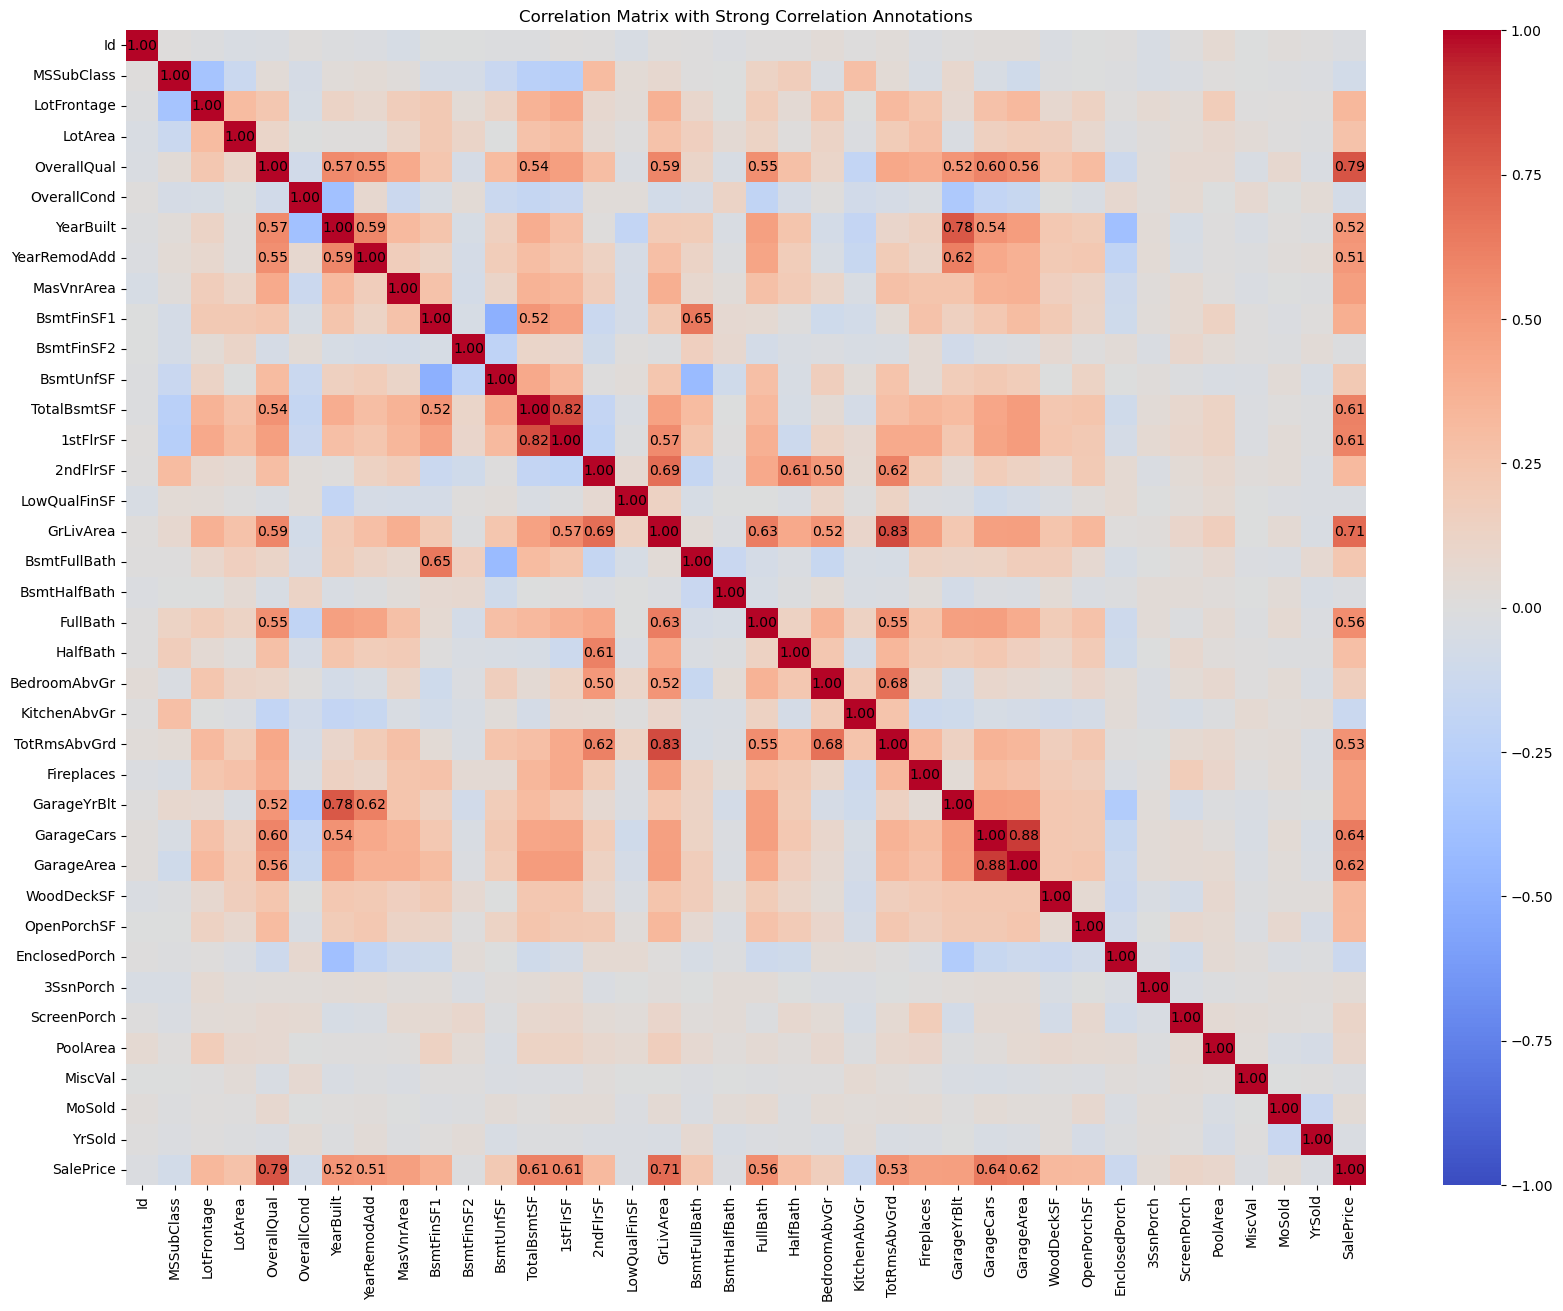

In [107]:

# Function to selectively annotate strong correlations, this shows a better look at the correlation
def annotate_heatmap(ax, data):
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            correlation = data.iloc[i, j]
            if np.abs(correlation) >= 0.5:  # Only annotate strong correlations
                ax.text(j + 0.5, i + 0.5, f'{correlation:.2f}', ha='center', va='center', color='black')

plt.figure(figsize=(20, 15))
ax = sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
annotate_heatmap(ax, correlation_matrix)
plt.title('Correlation Matrix with Strong Correlation Annotations')
plt.show()


### From the Heatmap plotted and also from the calculations of strong positive correlations, it can be seen that GarageArea, GarageCars, GrLivArea, OverallQual, TotalBsmtSF have positve correlation with SalePrice, will use this to explore some visualizations

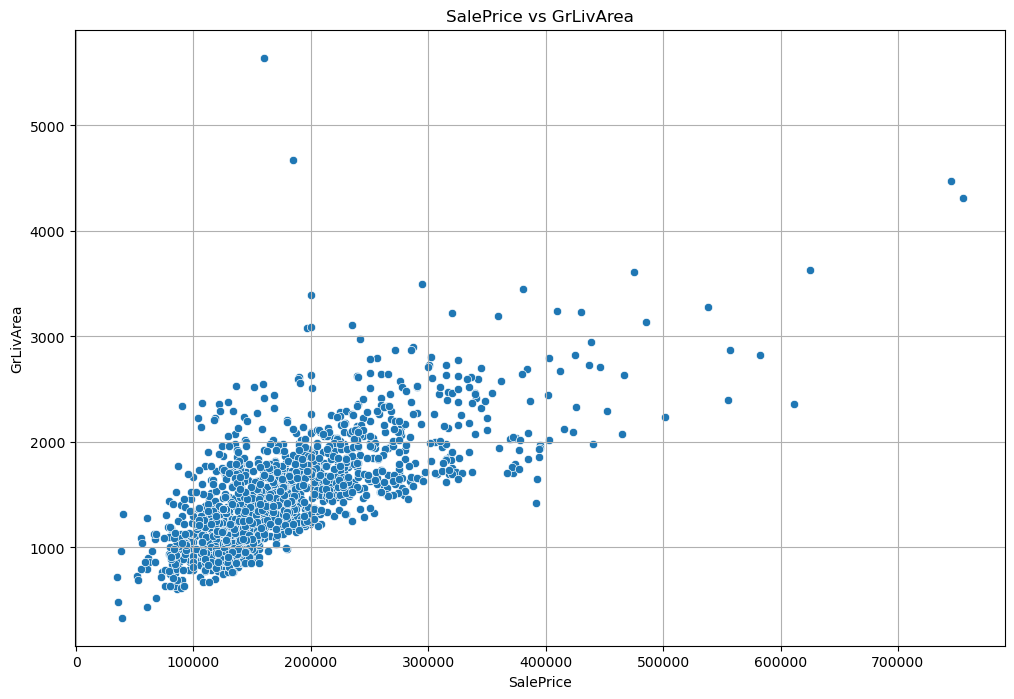

In [108]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=houseData_cleaned, x='SalePrice', y='GrLivArea')
plt.title('SalePrice vs GrLivArea')
plt.ylabel('GrLivArea')
plt.xlabel('SalePrice')
plt.grid(True)
plt.show()

From the plot, it can be seen that SalePrice and GrLivArea have a positive correlation mostly, meaning the higher the Above Ground level of the apartment the higher the SalePrice, with some few expection.

We are going to go a bit further by using OverallQual as hue to see how the Overall material and finish quality affect the SalePrice.

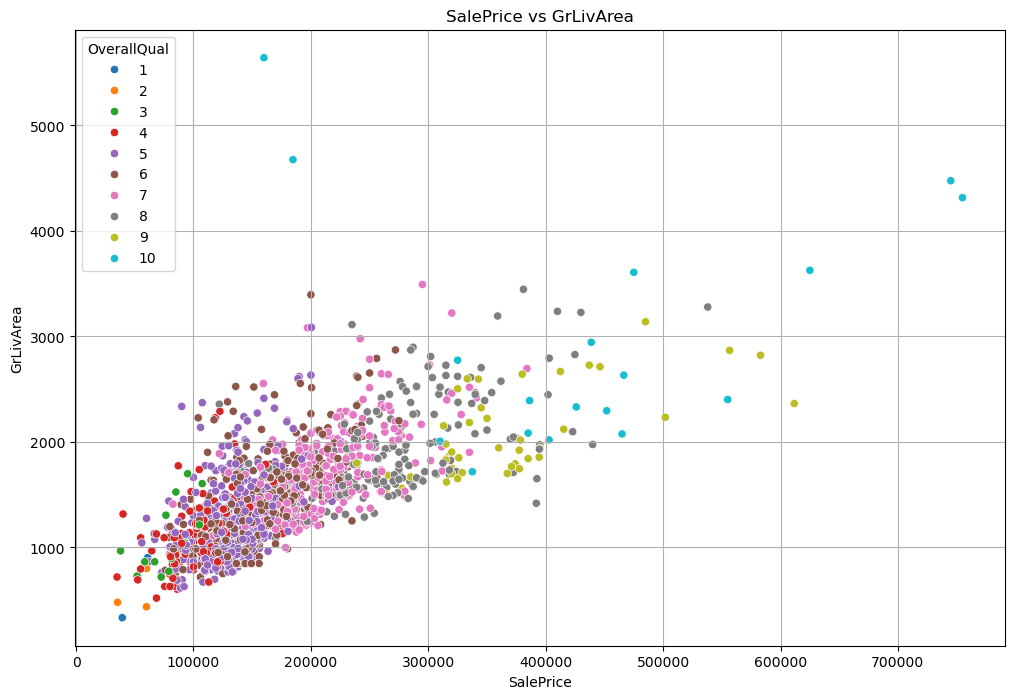

In [109]:
# Scatter plot to show the relationship SalePrice and GrLivArea, as they show a positive correction mostly. 
plt.figure(figsize=(12, 8))
sns.scatterplot(houseData_cleaned, y='GrLivArea', x='SalePrice', hue='OverallQual', palette="tab10")
plt.title('SalePrice vs GrLivArea')
plt.ylabel('GrLivArea')
plt.xlabel('SalePrice')
plt.grid(True)
plt.show()

### Insights

#### Adding hue (Overall) to the GrLivArea vs SalePrice scatterplot shows how Overall material and finish quality affect the price. OverallQual is ranked from 1-10, with 1 being the least rank and 10 being the highest rank.

#### All the Overall showed similar patterns as The more higher the GrLivArea the higher the SalePrice of the House, but with little outliers, whereby the plot so an almost insignificant entry where higher GrLivArea does not show Higher SalePrice. Take a look at OverallQual( Rank 10) for example.

In [110]:
# Now let's see the Relationship between SalePrice and OverallQual using a Barplot

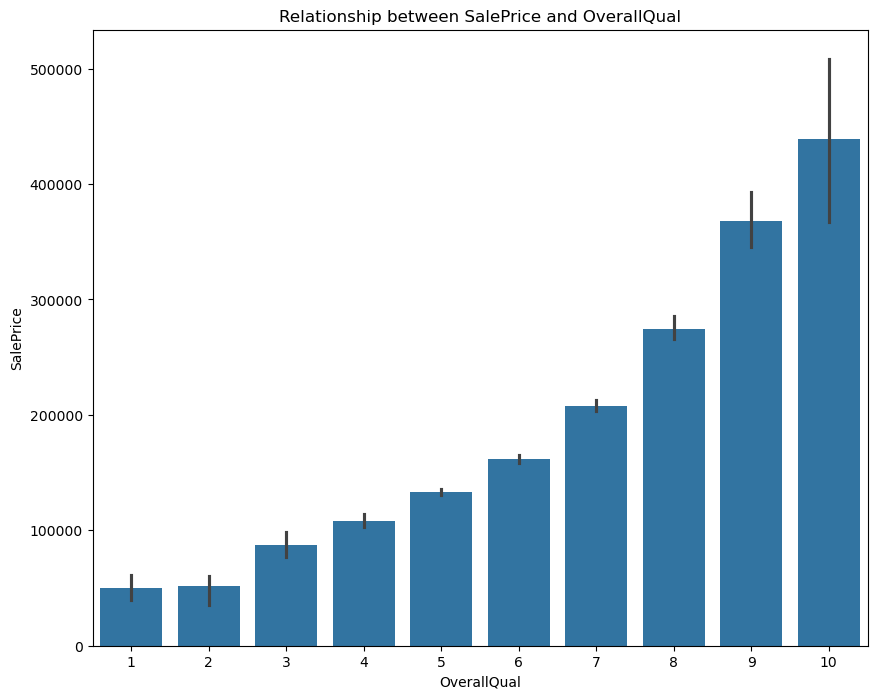

In [111]:
#Barplot
plt.figure(figsize=(10, 8))
sns.barplot(houseData_cleaned, x="OverallQual", y="SalePrice")
plt.title("Relationship between SalePrice and OverallQual")
plt.show()

This Barplot shows a clear linear relationship between SalePrice and OverallQual, As we can see the higher the OverallQual the higher the SaleaPrice

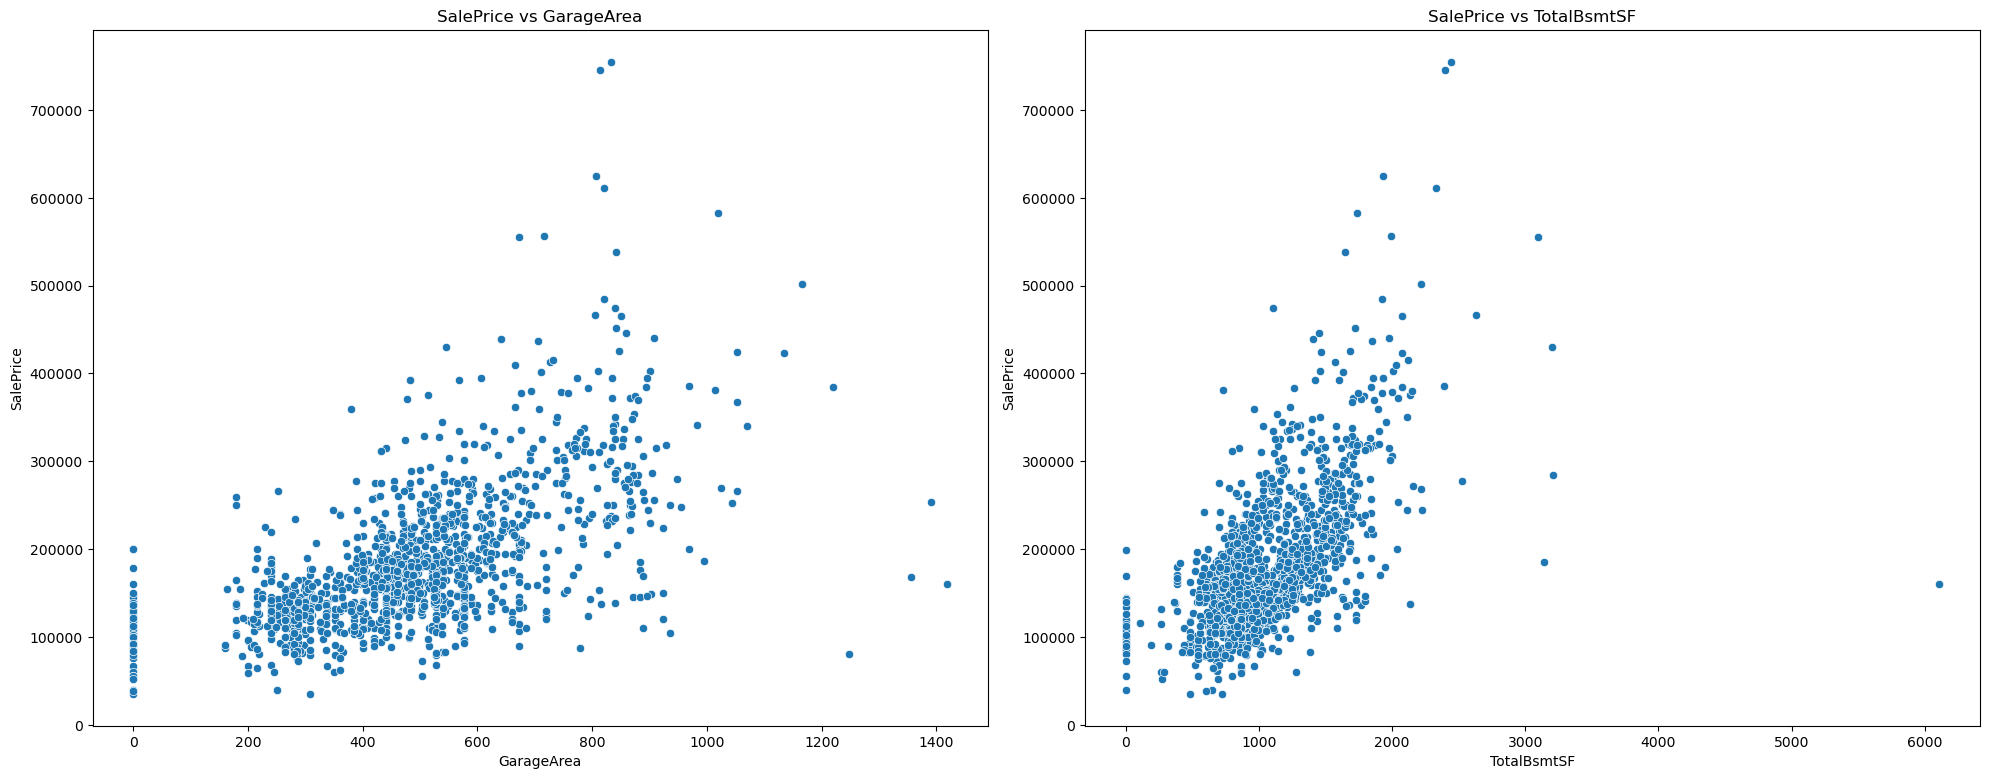

In [112]:

# List of features to plot against SalePrice
features = ['GarageArea', 'TotalBsmtSF']

# Scatter Plots
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=houseData_cleaned[feature], y=houseData_cleaned['SalePrice'])
    plt.title(f'SalePrice vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
plt.tight_layout()
plt.show()


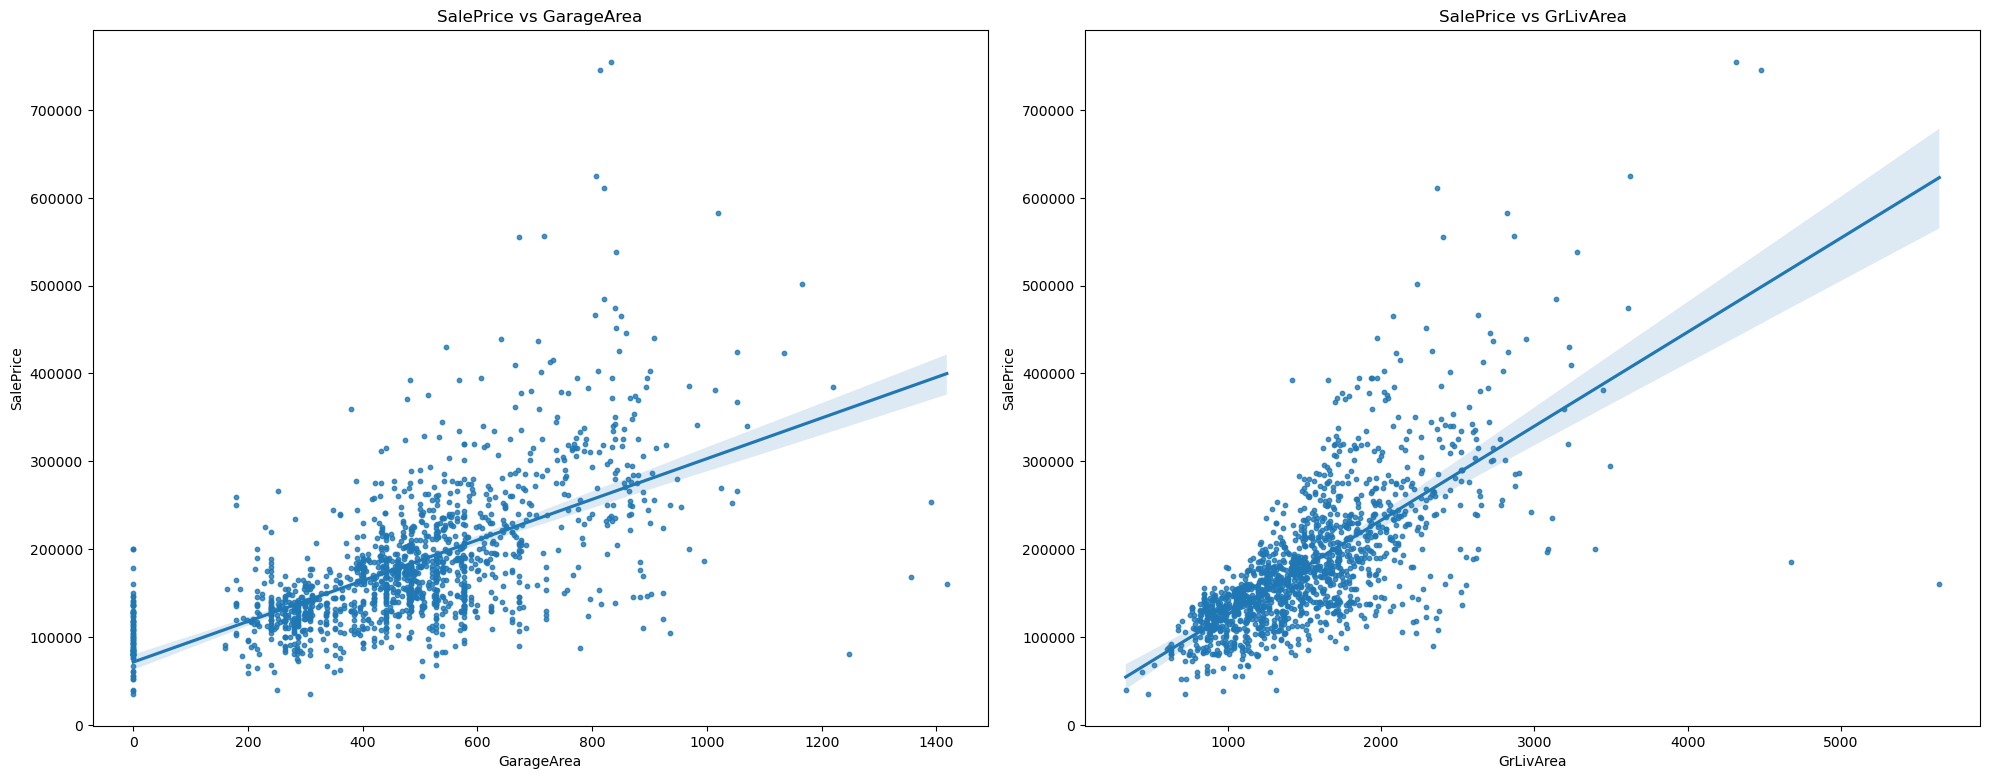

In [113]:
features = ['GarageArea', 'GrLivArea']


# Regression Plots
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.regplot(x=houseData_cleaned[feature], y=houseData_cleaned['SalePrice'], scatter_kws={'s': 10})
    plt.title(f'SalePrice vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
plt.tight_layout()
plt.show()

## Insights

#### Positive Correlation: Both plots show a positive correlation between the feature (GarageArea or GrLivArea) and SalePrice. As the GarageArea or GrLivArea increases, the SalePrice tends to increase as well.

#### Regression Line: The regression line indicates the best-fit linear relationship between the feature and the target variable (SalePrice). The slope of the line shows how much the SalePrice is expected to increase with a one-unit increase in the feature.

#### Confidence Interval: The shaded area around the regression line represents the 95% confidence interval. It provides a range within which the true regression line is expected to fall 95% of the time. A narrower band indicates more confidence in the estimated relationship, while a wider band indicates less confidence.

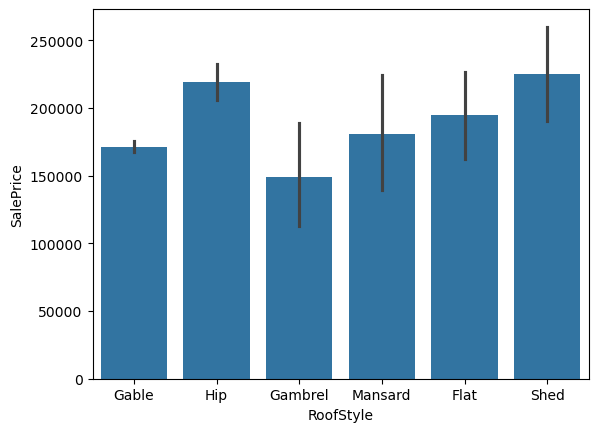

In [115]:
sns.barplot(houseData_cleaned, x='RoofStyle', y='SalePrice')
plt.show()

In [ ]:
# Task 2.3: Identify and handle outliers in the dataset.

### Kurtosis

#### Kurtosis is the measure of outliers present in the data.

##### High kurtosis (>3) indicates a large number of outliers and low kurtosis (<3). From the Kurtosis scale It shows that age have a kurtosis of less than 3 (<3). which should mean it has little to no outliers.

In [121]:
houseData_cleaned.kurtosis()

Id                -1.200000
MSSubClass         1.580188
LotFrontage       21.848165
LotArea          203.243271
OverallQual        0.096293
OverallCond        1.106413
YearBuilt         -0.439552
YearRemodAdd      -1.272245
MasVnrArea        10.154316
BsmtFinSF1        11.118236
BsmtFinSF2        20.113338
BsmtUnfSF          0.474994
TotalBsmtSF       13.250483
1stFlrSF           5.745841
2ndFlrSF          -0.553464
LowQualFinSF      83.234817
GrLivArea          4.895121
BsmtFullBath      -0.839098
BsmtHalfBath      16.396642
FullBath          -0.857043
HalfBath          -1.076927
BedroomAbvGr       2.230875
KitchenAbvGr      21.532404
TotRmsAbvGrd       0.880762
Fireplaces        -0.217237
GarageYrBlt       -0.266503
GarageCars         0.220998
GarageArea         0.917067
WoodDeckSF         2.992951
OpenPorchSF        8.490336
EnclosedPorch     10.430766
3SsnPorch        123.662379
ScreenPorch       18.439068
PoolArea         223.268499
MiscVal          701.003342
MoSold            -0

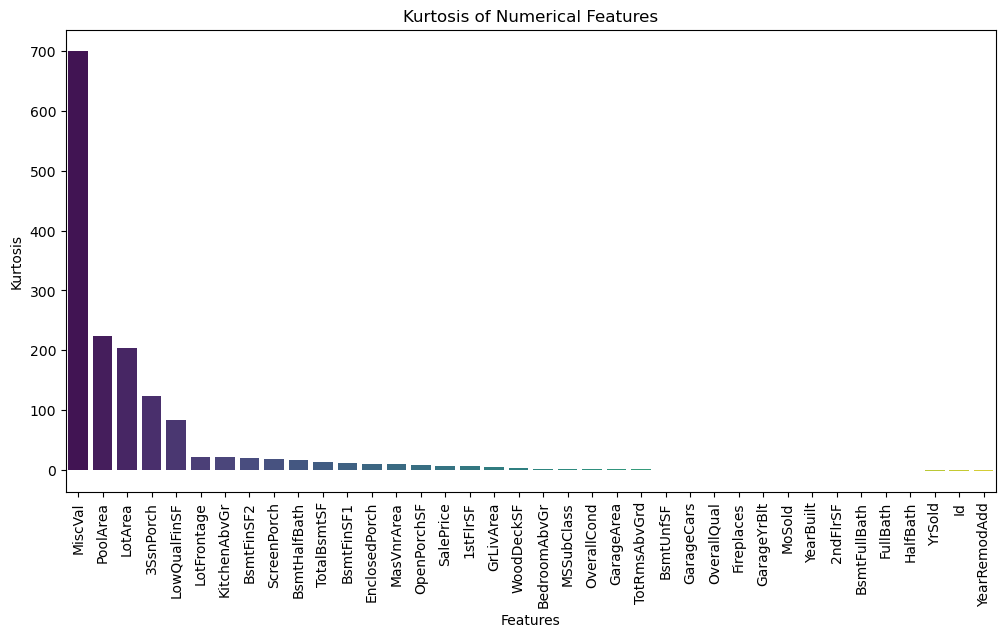

In [122]:
# Calculate kurtosis using Pandas
kurtosis_values = houseData_cleaned.kurt().sort_values(ascending=False)

# Plot the kurtosis values
plt.figure(figsize=(12, 6))
sns.barplot(x=kurtosis_values.index, y=kurtosis_values.values, palette="viridis")
plt.xticks(rotation=90)
plt.title('Kurtosis of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Kurtosis')
plt.show()

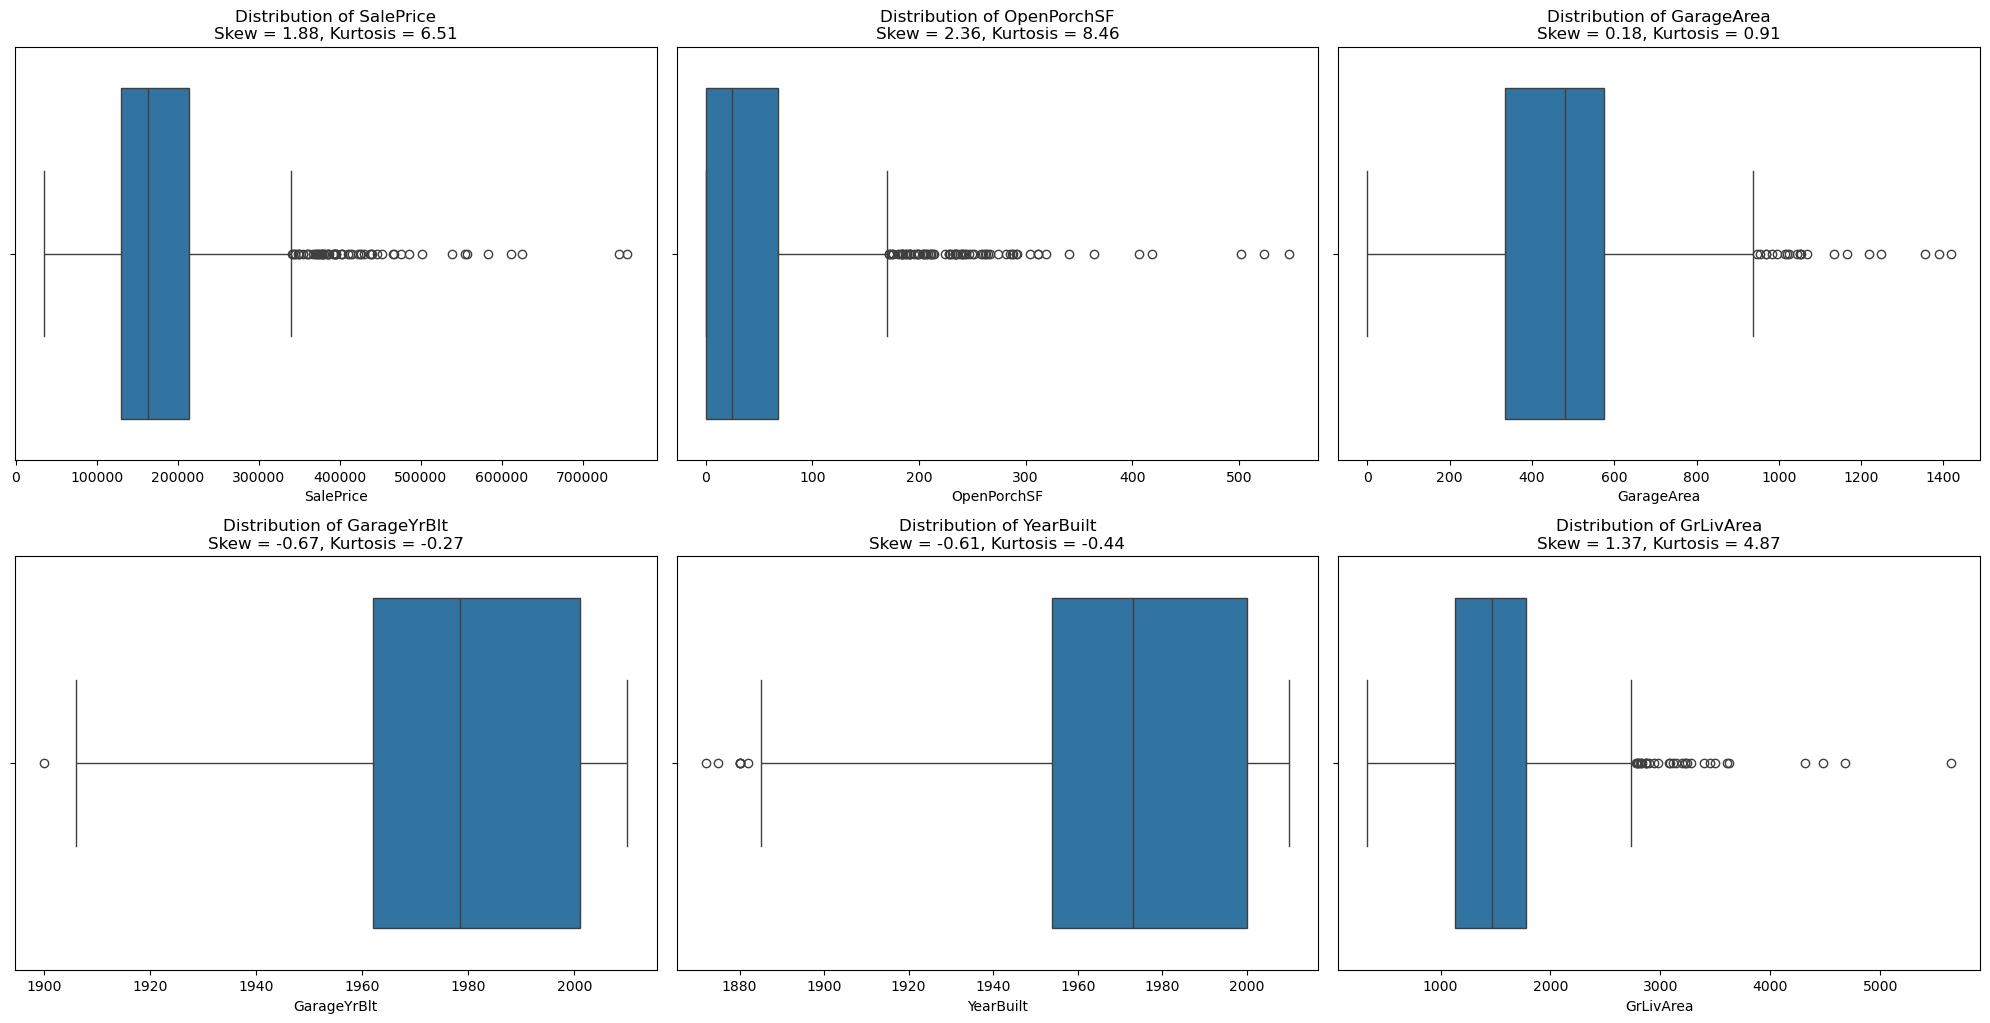

In [166]:
from scipy.stats import skew, kurtosis

# Visualizations with boxplot
plt.figure(figsize=(20, 15))
for i, feature in enumerate(num_zoom_features_1, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(houseData_cleaned[feature], orient='h')
    skew_value = skew(houseData_cleaned[feature].dropna())
    kurtosis_value = kurtosis(houseData_cleaned[feature].dropna())
    plt.title(f'Distribution of {feature}\nSkew = {skew_value:.2f}, Kurtosis = {kurtosis_value:.2f}')
        
plt.tight_layout()
plt.show()

In [131]:
houseData_cleaned.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [173]:
import numpy as np
from scipy.stats import skew, kurtosis

def analyze_and_remove_outliers(data, features):
    # Initialize lists to store the results
    feature_list = []
    lower_limit_list = []
    upper_limit_list = []
    iqr_list = []
    num_outliers_list = []
    num_non_outliers_list = []


    # Create a copy of the original data to remove outliers
    data_no_outliers = data.copy()

    # Loop through each feature in the provided list
    for feature in features:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        
        # Calculate the Interquartile Range (IQR)
        IQR = Q3 - Q1
        
        # Calculate the lower and upper limits for outliers
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        
        # Identify outliers
        outliers = (data[feature] < lower_limit) | (data[feature] > upper_limit)
        
        # Append results to the lists
        feature_list.append(feature)
        lower_limit_list.append(lower_limit)
        upper_limit_list.append(upper_limit)
        iqr_list.append(IQR)
        num_outliers_list.append(len(data[feature][outliers]))
        num_non_outliers_list.append(len(data[feature]) - len(data[feature][outliers]))

        # Remove outliers from the data
        data_no_outliers = data_no_outliers[~outliers]

    # Create a new DataFrame to store the results
    outlier_analysis_df = pd.DataFrame({
        'Feature': feature_list,
        'Lower Limit': lower_limit_list,
        'Upper Limit': upper_limit_list,
        'IQR': iqr_list,
        'Number of Outliers': num_outliers_list,
        'Number of Non-Outliers': num_non_outliers_list
    })
    
    return outlier_analysis_df, data_no_outliers


# Perform the outlier analysis and remove outliers
outlier_analysis_df, houseData_without_outliers = analyze_and_remove_outliers(houseData_cleaned, numerical_features)

In [174]:
outlier_analysis_df

,Feature,Lower Limit,Upper Limit,IQR,Number of Outliers,Number of Non-Outliers
0,Id,-728.500,2189.500,729.50,0,1460
1,MSSubClass,-55.000,145.000,50.00,103,1357
2,LotFrontage,31.500,107.500,19.00,106,1354
3,LotArea,1481.500,17673.500,4048.00,69,1391
4,OverallQual,2.000,10.000,2.00,2,1458
5,OverallCond,3.500,7.500,1.00,125,1335
6,YearBuilt,1885.000,2069.000,46.00,7,1453
7,YearRemodAdd,1911.500,2059.500,37.00,0,1460
8,MasVnrArea,-246.375,410.625,164.25,98,1362
9,BsmtFinSF1,-1068.375,1780.625,712.25,7,1453


In [158]:
houseData_cleaned.shape # This is the shape of the houseData before the outlier analysis

(1460, 77)

In [157]:
houseData_without_outliers.shape # This is the shape of the houseData after the outlier analysis

(557, 77)

From the outliers_analysis_df, we all numerical features, Their IQR, the No of outliers, and No of Non outliers.
When all the outliers was removed from the houseData_cleaned dataframe we notice a large some of the data would be lost, and this will impact our model. The "houseData_without_outliers" dataframe show us what will happen if we remove all the outliers.

We are going to move forward with houseData_cleaned dataframe for further analysis.

### Phase 3: Feature Engineering

In [ ]:
# Task 3.1: Create new features that may help improve the model's performance.

In [ ]:
# Task 3.2: Encode categorical variables using one-hot or label encoding techniques.

In [ ]:
# Task 3.3: Normalize or standardize numerical features as needed.

In [ ]:
# Plotting distribution for Duration of call
plt.figure(figsize=(10, 6))  # Create a new figure with a size of 10 inches by 6 inches
sns.histplot(bank_data, x='duration', bins=50, kde=True)  # Create a histogram with 50 bins and a kernel density estimate (KDE) for the 'duration' feature from 'bank_data'
plt.title('Distribution of Duration')  # Set the title of the plot
plt.xlabel('Duration')  # Set the label for the x-axis
plt.ylabel('Count')  # Set the label for the y-axis
plt.show()  # Display the plot
